In [1]:
%load_ext autoreload

In [14]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
from IPython.utils import io
from skimage import io
from api import API
from image import NoFaceDetectedException

In [3]:
data_path = 'tests/.data/lfw/'
image = 'tests/.data/lfw/{0}/{0}_{1}.jpg'

In [4]:
def get_names_by_count(path):
    count_by_names_dict = {}
    for root, dirnames, filenames in os.walk(path):
        for dirname in dirnames:
            if dirname not in count_by_names_dict:
                count_by_names_dict[dirname] = 0
            directory_path = os.path.join(path, dirname)
            for filename in os.listdir(directory_path):
                if filename.endswith(".jpg"):
                    count_by_names_dict[dirname] += 1
    return [x for x in count_by_names_dict.iteritems()]

In [5]:
names_by_count = get_names_by_count(data_path)
sorted_names_by_count = sorted(names_by_count, key=lambda x: x[1], reverse=True)

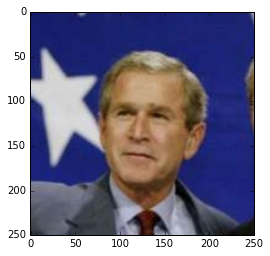

In [15]:
imshow(io.imread(image.format(sorted_names_by_count[0][0], str(1).zfill(4))))

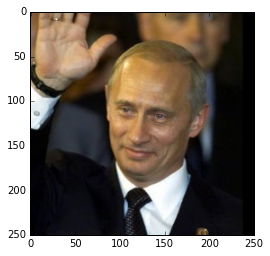

In [16]:
imshow(io.imread(image.format(sorted_names_by_count[12][0], str(1).zfill(4))))

In [6]:
api = API()
api.remove_images()

name = sorted_names_by_count[0][0]
print name
for i in range(35):
    api.add_image(name, image.format(name, str(i + 1).zfill(4)))
    
name = sorted_names_by_count[12][0]
print name
for i in range(35):
    try:
        api.add_image(name, image.format(name, str(i + 1).zfill(4)))
    except NoFaceDetectedException:
        pass

George_W_Bush
Vladimir_Putin


In [7]:
api.train()

Using gpu device 0: GRID K520 (CNMeM is enabled with initial size: 98.0% of memory, CuDNN 3007)
Using Theano backend.


Train on 248 samples, validate on 28 samples
Epoch 1/20
248/248 [==============================] - 7s - loss: 0.7274 - acc: 0.4919 - val_loss: 0.6812 - val_acc: 0.5357
Epoch 2/20
248/248 [==============================] - 7s - loss: 0.6798 - acc: 0.5927 - val_loss: 0.6610 - val_acc: 0.8929
Epoch 3/20
248/248 [==============================] - 7s - loss: 0.6678 - acc: 0.6452 - val_loss: 0.6369 - val_acc: 0.8929
Epoch 4/20
248/248 [==============================] - 7s - loss: 0.6463 - acc: 0.6532 - val_loss: 0.6605 - val_acc: 0.5357
Epoch 5/20
248/248 [==============================] - 7s - loss: 0.6464 - acc: 0.5766 - val_loss: 0.6680 - val_acc: 0.5000
Epoch 6/20
248/248 [==============================] - 7s - loss: 0.6400 - acc: 0.6411 - val_loss: 0.5694 - val_acc: 0.8929
Epoch 7/20
248/248 [==============================] - 7s - loss: 0.5479 - acc: 0.8226 - val_loss: 0.5405 - val_acc: 0.7143
Epoch 8/20
248/248 [==============================] - 7s - loss: 0.5906 - acc: 0.7016 - val_lo

In [8]:
api.load_model()

Using Theano backend.


In [9]:
name = sorted_names_by_count[0][0]
class_name = sorted_names_by_count[0][0]
with io.capture_output() as captured:
    scores = [api.compute_score(class_name, image.format(name, str(i + 1).zfill(4))) for i in range(35, 45)]
print 'Average score of images from ' + name + ' being of class ' + class_name + ' is: ' + str(np.average(np.array(scores)))

name = sorted_names_by_count[0][0]
class_name = sorted_names_by_count[12][0]
with io.capture_output() as captured:
    scores = [api.compute_score(class_name, image.format(name, str(i + 1).zfill(4))) for i in range(35, 45)]
print 'Average score of images from ' + name + ' being of class ' + class_name + ' is: ' + str(np.average(np.array(scores)))

name = sorted_names_by_count[12][0]
class_name = sorted_names_by_count[0][0]
with io.capture_output() as captured:
    scores = [api.compute_score(class_name, image.format(name, str(i + 1).zfill(4))) for i in range(35, 45)]
print 'Average score of images from ' + name + ' being of class ' + class_name + ' is: ' + str(np.average(np.array(scores)))

name = sorted_names_by_count[12][0]
class_name = sorted_names_by_count[12][0]
with io.capture_output() as captured:
    scores = [api.compute_score(class_name, image.format(name, str(i + 1).zfill(4))) for i in range(35, 45)]
print 'Average score of images from ' + name + ' being of class ' + class_name + ' is: ' + str(np.average(np.array(scores)))

Average score of images from George_W_Bush being of class George_W_Bush is: 0.784863701463
Average score of images from George_W_Bush being of class Vladimir_Putin is: 0.215136286454
Average score of images from Vladimir_Putin being of class George_W_Bush is: 0.050438561464
Average score of images from Vladimir_Putin being of class Vladimir_Putin is: 0.949561446905


In [18]:
api.compute_score(sorted_names_by_count[12][0], image.format(sorted_names_by_count[12][0], str(46).zfill(4)))

1/1 [==============================] - 0s


0.99535650014877319